# Build and test the model for predicting the price of a second-hand car in the UK

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv("autotrader_prices_eda.csv")

## choose relevant columns

In [19]:
df.columns

Index(['BHP', 'ULEZ', 'body', 'engine', 'fuel', 'mileage', 'name', 'owners',
       'price', 'transmission', 'year', 'make', 'model', 'se', 'eco', 'sport',
       'm_sport', 'lux', 'sat_nav', 'bluetooth', 'leather', 'three_door',
       'year_reg', 'name_len'],
      dtype='object')

In [20]:
# exclude name feature
df_model = df.drop("name", axis=1)

In [21]:
df_model.head()

,BHP,ULEZ,body,engine,fuel,mileage,owners,price,transmission,year,...,eco,sport,m_sport,lux,sat_nav,bluetooth,leather,three_door,year_reg,name_len
0,108.0,ULEZ,Hatchback,1.6,Diesel,82850,2.0,7991,Manual,2015,...,0,0,0,0,1,1,0,0,15 reg,64
1,148.0,ULEZ,Hatchback,2.0,Diesel,38627,2.0,10980,Manual,2015,...,0,0,0,0,1,0,0,0,65 reg,60
2,108.0,ULEZ,Hatchback,1.6,Diesel,84812,2.0,8350,Manual,2015,...,0,1,0,0,1,0,0,0,15 reg,50
3,182.0,ULEZ,Hatchback,2.0,Diesel,74413,2.0,9699,Automatic,2015,...,0,1,0,0,0,0,0,0,15 reg,58
4,108.0,ULEZ,Hatchback,1.6,Diesel,59152,2.0,8990,Manual,2015,...,0,1,0,0,0,0,0,0,15 reg,32


In [22]:
# double check there is no missing values
df_model.isna().sum()

BHP             0
ULEZ            0
body            0
engine          0
fuel            0
mileage         0
owners          0
price           0
transmission    0
year            0
make            0
model           0
se              0
eco             0
sport           0
m_sport         0
lux             0
sat_nav         0
bluetooth       0
leather         0
three_door      0
year_reg        0
name_len        0
dtype: int64

## get dummy data

In [23]:
df_dum = pd.get_dummies(df_model)

In [24]:
df_dum.head()

,BHP,engine,mileage,owners,price,year,se,eco,sport,m_sport,...,year_reg_18 reg,year_reg_19 reg,year_reg_20 reg,year_reg_64 reg,year_reg_65 reg,year_reg_66 reg,year_reg_67 reg,year_reg_68 reg,year_reg_69 reg,year_reg_70 reg
0,108.0,1.6,82850,2.0,7991,2015,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,148.0,2.0,38627,2.0,10980,2015,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,108.0,1.6,84812,2.0,8350,2015,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,182.0,2.0,74413,2.0,9699,2015,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,108.0,1.6,59152,2.0,8990,2015,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df_dum.drop("price", axis=1)
y = df_dum["price"].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## multiple linear regression

In [28]:
# Build Ordinary Least Square (OLS)
import statsmodels.api as sm

In [29]:
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     144.9
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.19e-273
Time:                        17:11:39   Log-Likelihood:                -5570.4
No. Observations:                 626   AIC:                         1.122e+04
Df Residuals:                     586   BIC:                         1.140e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                  4.838e+04   1.91e+05      0.253      0.800   -3.27e+05    4.24e+05
BHP                                      -1.2768      2.719     -0.470      0.639      -6.617       4.063
engine                                 3271.4169    309.112     10.583      0.000    2664.314    3878.520
mileage                                  -0.0698      0.006    -12.515      0.000      -0.081      -0.059
owners                                   95.7803    569.105      0.168      0.866   -1021.953    1213.513
year                                    -63.6410    283.125     -0.225      0.822    -619.705     492.422
se                                    -2210.7769    332.398     -6.651      0.000   -2863.614   -1557.940
eco                                    1124.4759    981.070      1.146      0.252    -802.365    3051.316
sport                                 -1230.4350    213.531     -5.762      0.000   -1649.815    -811.055
m_sport                                2726.2872    245.895     11.087      0.000    2243.345    3209.229
lux                                   -1166.3071    807.808     -1.444      0.149   -2752.858     420.244
sat_nav                                -491.2462    256.259     -1.917      0.056    -994.545      12.052
bluetooth                               333.0545    433.210      0.769      0.442    -517.778    1183.887
leather                                -830.6099    455.675     -1.823      0.069   -1725.566      64.346
three_door                              446.8255    842.388      0.530      0.596   -1207.643    2101.294
name_len                                 23.1877      8.247      2.812      0.005       6.990      39.385
ULEZ_Non-ULEZ                          2.365e+04   9.57e+04      0.247      0.805   -1.64e+05    2.12e+05
ULEZ_ULEZ                              2.473e+04   9.56e+04      0.259      0.796   -1.63e+05    2.13e+05
body_Estate                             1.76e+04   6.38e+04      0.276      0.783   -1.08e+05    1.43e+05
body_Hatchback                         1.505e+04   6.38e+04      0.236      0.814    -1.1e+05     1.4e+05
body_Saloon                            1.573e+04   6.38e+04      0.247      0.805    -1.1e+05    1.41e+05
fuel_Diesel                            3907.6702   3.87e+04      0.101      0.920    -7.2e+04    7.98e+04
fuel_Hybrid – Diesel/Electric          2.405e+04   3.87e+04      0.621      0.535    -5.2e+04       1e+05
fuel_Hybrid – Petrol/Electric          7555.3639   3.67e+04      0.206      0.837   -6.45e+04    7.96e+04
fuel_Hybrid – Petrol/Electric Plug-in  7800.9023   3.87e+04      0.202      0.840   -6.81e+04    8.37e+04
fuel_Petrol                            5066.2631   3.87e+04      0.131      0.896   -7.09e+04     8.1e+04
transmiss

In [31]:
# Build linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5))

-1414.9359076167216

## lasso regression

In [36]:
# Build linear regression model with L1 regularization
from sklearn.linear_model import Lasso

In [37]:
lm_lasso = Lasso()
lm_lasso.fit(X_train, y_train)

np.mean(cross_val_score(lm_lasso, X_train, y_train, scoring = "neg_mean_absolute_error", cv=5))

-1404.8027511776872

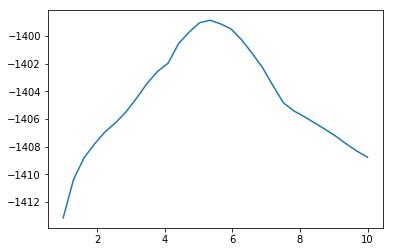

In [62]:
# tune the model for the optimisation alpha
alpha = []
error = []

for a in np.linspace(1,10,30):
    alpha.append(a)
    lm_lasso_tune = Lasso(alpha=a)
    error.append(np.mean(cross_val_score(lm_lasso_tune, X_train, y_train, scoring = "neg_mean_absolute_error", cv=3)))

plt.plot(alpha,error)

In [64]:
# find alpha value with minimum mean absolute error
err = list(zip(alpha,error))
df_err = pd.DataFrame(err, columns=["alpha","error"])
df_err[df_err.error == np.max(df_err.error)]

,alpha,error
14,5.344828,-1398.860621


In [80]:
lm_lasso = Lasso(alpha=5.344828)
lm_lasso.fit(X_train, y_train)
np.mean(cross_val_score(lm_lasso, X_train, y_train, scoring = "neg_mean_absolute_error", cv=3))

-1398.8606213989249

## RandomForestRegressor

In [68]:
# build a random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

cross_val_score(rf, X_train, y_train, scoring = "neg_mean_absolute_error", cv=3)

array([-1220.2691018 , -1322.80113772, -1196.45686747])

## hyperparameter tuning

In [71]:
# tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {"n_estimators": range(10,300,10),
          "criterion":["mse", "mae"],
          "max_features":["auto", "sqrt", "log2"]}

gs = GridSearchCV(rf, params, scoring="neg_mean_absolute_error", cv=3)
gs.fit(X_train, y_train)

D:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 300, 10), 'criterion': ['mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [72]:
gs.best_score_

-1237.3833795918367

In [73]:
gs.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 70}

## test ensembles

In [82]:
# predict prices on test set
pred_lm = lm.predict(X_test)
pred_lm_lasso = lm_lasso.predict(X_test)
pred_rf = gs.best_estimator_.predict(X_test)

In [83]:
from sklearn.metrics import mean_absolute_error
valuation = {"Linear Regression": mean_absolute_error(y_test, pred_lm),
             "Lasso Regression": mean_absolute_error(y_test, pred_lm_lasso),
             "RandomForestRegressor": mean_absolute_error(y_test, pred_rf)}
valuation

{'Linear Regression': 1388.0480816788738,
 'Lasso Regression': 1351.0519991933188,
 'RandomForestRegressor': 1062.2834467120183}

# Deploy the model into production

In [85]:
# pickle the model
import pickle
auto_estimator = {'model': gs.best_estimator_}
pickle.dump(auto_estimator, open('model_file' + ".p", "wb"))

In [96]:
# test the pickled model for prediction

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(X_test.iloc[1,:].values.reshape(1,-1))

array([17593.42857143])

In [98]:
list(X_test.iloc[1,:])

[148.0,
 1.5,
 22115.0,
 2.0,
 2018.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 32.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]